## PCA 
### Principal Component Analysis
#### Analiza głównych składowych

<img src="pca.png" alt="Drawing" style="width: 7in; whight: 7in;"/>


## KPCA
### Kernel Principal Component Analysis

![kpca](kpca.png)

## Klasteryzacja i klasyfikacja

![clustering_and_classification](clustering_and_classification.png)

## K Nearest Neighbours

![knn](knn.png)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

Data source:

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Dataset description:

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

![irises](irises.jpg)

In [3]:
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('iris.csv', names=names)
print(df.shape)
df.head()

(150, 5)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = df.iloc[:, :4] # extracting all rows, first 4 columns (skipping 'class' column)
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
def perform_pca(data, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, pca

def plot_pca(components, dims, plot_kwargs={}):

    if dims == 2:
        plt.scatter(components[0], components[1], **plot_kwargs)
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")  
        plt.show()
    
    elif dims == 3:
        ax = plt.axes(projection='3d')
        ax.scatter3D(components[0], components[1], components[2], **plot_kwargs);
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        plt.show()

In [6]:
pca_components, pca = perform_pca(data, number_of_components=None, scale=True)
print(pca_components.shape)
pca_components.head()

(150, 4)


,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


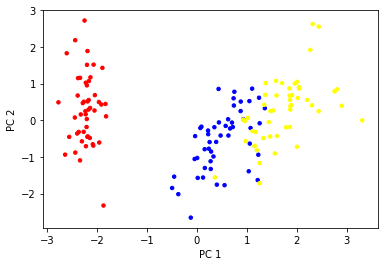

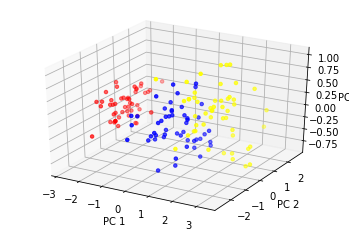

In [8]:
# %matplotlib notebook
colors_dict = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'blue',
    'Iris-virginica': 'yellow'
}

colors = [colors_dict[c] for c in df['class']]

plot_setting = {
    's': 12,
    'c': colors
}
plot_pca(components=pca_components, dims=2, plot_kwargs=plot_setting)
plot_pca(components=pca_components, dims=3, plot_kwargs=plot_setting)

In [9]:
def perform_kernel_pca(data, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
    components = kpca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, kpca

In [10]:
kpca_components, kpca = perform_kernel_pca(data, number_of_components=6, scale=True)
print(kpca_components.shape)
kpca_components.head()

(150, 6)


,0,1,2,3,4,5
0,-0.798968,-0.099666,0.174948,0.051330,0.070914,-0.037973
1,-0.674393,0.104370,-0.435307,0.181854,0.027947,0.006371
2,-0.763813,0.007165,-0.308898,0.186043,0.085445,-0.062637
3,-0.713482,0.051812,-0.422346,0.187277,0.054852,-0.047211
4,-0.787903,-0.131853,0.258047,-0.015065,0.058494,-0.052876


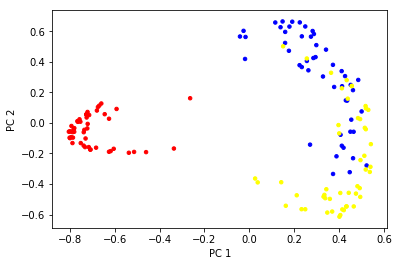

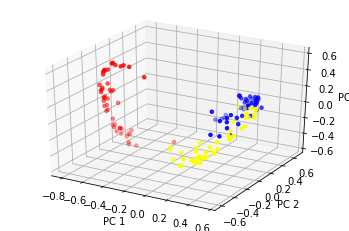

In [11]:
# %matplotlib notebook
colors_dict = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'blue',
    'Iris-virginica': 'yellow'
}

colors = [colors_dict[c] for c in df['class']]

plot_setting = {
    's': 12,
    'c': colors
}
plot_pca(components=kpca_components, dims=2, plot_kwargs=plot_setting)
plot_pca(components=kpca_components, dims=3, plot_kwargs=plot_setting)

In [12]:
def display_scree_plot(values, number_of_components=None, percentage=False):
    
    total = sum(values)
    bar_heights = values[:number_of_components]
    
    if percentage:
        bar_heights = list(map(lambda x: x * 100 / total, bar_heights))
        plt.ylabel("[%]")

    bar_x_coordinates = np.array(range(len(bar_heights)))
    labels = ['PC ' + str(i) for i in range(1, len(bar_heights) + 1)]
    
    plt.bar(bar_x_coordinates, bar_heights, tick_label=labels)
    plt.show()
    return

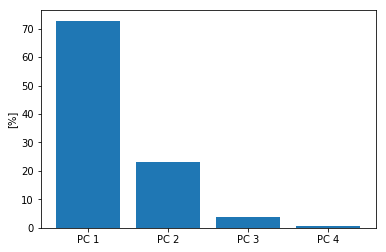

In [15]:
display_scree_plot(pca.explained_variance_, number_of_components=None, percentage=True)

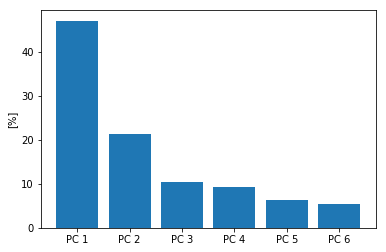

In [16]:
display_scree_plot(kpca.lambdas_, number_of_components=None, percentage=True)

In [17]:
def knn_stats(samples, labels, n_neighbours):
    '''Calculates the percentage of neighbours that belong to the same class for each sample.'''
    
    nbrs = NearestNeighbors(n_neighbours, algorithm='brute').fit(samples)
    distances, indices = nbrs.kneighbors(samples)
    
    neighbour_stats = []
    
    for index, neighbours in enumerate(indices):
        same_cluster_neighbours = filter(
            lambda neighbour: labels[neighbour] == labels[index],
            neighbours
        )
        neighbour_stats.append(len(list(same_cluster_neighbours)) / n_neighbours)
        
    return neighbour_stats

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

stats = knn_stats(scaled_data, df['class'], 5)
print('scaled original data: ', np.mean(stats))

scaled original data:  0.9426666666666665


In [19]:
stats = knn_stats(pca_components.iloc[:, :2], df['class'], 5)
print('pca: ', np.mean(stats))

stats = knn_stats(kpca_components.iloc[:, :2], df['class'], 5)
print('kpca: ', np.mean(stats))

pca:  0.9053333333333334
kpca:  0.852
